In [10]:
import os, sys
import subprocess
from utilities_pipeline_status import *
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from registration_utilities import *
from annotation_utilities import *
from metadata import *
from data_manager_v2 import DataManager
from a_driver_utilities import *

from a_GUI_utilities_pipeline_status import *

print all_stacks

Setting environment for Precision WorkStation for Alex Newberry
[521 1057 128 465 None None]
[521 1057 128 465 None None]
[216 1229 100 848 None None]
[216 1229 100 848 None None]
['DK17CZI', 'RENAMEDK17CZI', 'DK17RENAME']


No vtk

In [11]:
stack = 'DK23'

pipeline_status = get_pipeline_status( stack )
print(pipeline_status)

KeyError: 'DK23'

In [122]:
def apply_transform( stack, T, input_fp, output_fp=None ):
    """
    Applies transform T onto the image at img_fp and return the result
    """
    
    #version = get_version(stack)
    
    #img_fp = DataManager.get_image_filepath_v2(stack=stack, section=metadata_cache['filenames_to_sections'][stack][fn], 
                            #prep_id='None', resol='thumbnail', version=version)
    img_fp = input_fp
    
    op_str = ''
    op_str += " +distort AffineProjection '%(sx)f,%(rx)f,%(ry)f,%(sy)f,%(tx)f,%(ty)f' " % {
     'sx':T[0,0],
     'sy':T[1,1],
     'rx':T[1,0],
     'ry':T[0,1],
     'tx':T[0,2],
     'ty':T[1,2],}
    
    x = 0
    y = 0
    w = 2000
    h = 1000
    op_str += ' -crop %(w)sx%(h)s%(x)s%(y)s\! ' % {
                     'x': '+' + str(x) if int(x) >= 0 else str(x),
                     'y': '+' + str(y) if int(y) >= 0 else str(y),
                     'w': str(w),
                     'h': str(h)}
    
    if output_fp==None:
        output_fp_root = os.path.join( os.environ['ROOT_DIR'], 'CSHL_data_processed', stack, 'tmp')
        if not os.path.exists( output_fp_root ):
            os.makedirs(output_fp_root)
        output_fp = os.path.join( output_fp_root, 'tmp_'+fn+'.tif' )
        delete_after = True
    else:
        if not os.path.exists( os.path.dirname(output_fp) ):
            os.makedirs( os.path.dirname(output_fp) )
        delete_after = False

    try:
        bg_color = 'black' #get_padding_color(stack)
        
        execute_command("convert \"%(input_fp)s\"  +repage -virtual-pixel background \
-background %(bg_color)s %(op_str)s -flatten -compress lzw \"%(output_fp)s\"" % \
                    {'op_str': op_str,
                     'input_fp': img_fp,
                     'output_fp': output_fp,
                     'bg_color': bg_color})
        
        img = cv2.imread( output_fp )
        if delete_after:
            os.remove( output_fp ) 
            pass
        return img
    except Exception as e:
        print e
        return None
    
def get_anchor_transform( stack, fn, downsampled=True ):
    if downsampled:
        T = DataManager.load_transforms(stack, downsample_factor=32, use_inverse=True)[fn]
    else:
        T = DataManager.load_transforms(stack, use_inverse=True)[fn]
    return T

In [123]:
for fn in metadata_cache['filenames_to_sections'][stack].keys():
    T = get_anchor_transform(stack, fn, downsampled=True)

In [124]:
T

array([[ 9.98802433e-01,  4.89254601e-02,  3.26071550e+02],
       [-4.89254601e-02,  9.98802433e-01,  1.54546746e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [67]:
5730./29

197.58620689655172

In [132]:
# Transform thumbnail files!
for fn in metadata_cache['filenames_to_sections'][stack].keys():
    fn_secondary_C = fn.replace('C0','C1').replace('CFP','TuYFP') + '_raw.tif'
    
    fp_secondary_C = os.path.join( DataManager.get_images_root_folder( stack ), stack+'_raw_C0', fn_secondary_C)
    fp_secondary_C_thumbnail = os.path.join( DataManager.get_images_root_folder( stack ), stack+'_raw_thumbnail_C0', fn_secondary_C)
    fp_secondary_C_output = os.path.join( DataManager.get_images_root_folder( stack ), stack+'_prep1_thumbnail_C0', fn_secondary_C)
    
    # Load anchor transform
    T = get_anchor_transform(stack, fn, downsampled=True)
    
    apply_transform( stack, T, input_fp=fp_secondary_C_thumbnail, output_fp=fp_secondary_C_output )

convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide011_2019_09_10_S13_S12_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.998219,-0.059649,0.059649,0.998219,301.218910,113.662715'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide011_2019_09_10_S13_S12_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide029_2019_09_10_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.998287,-0.058511,0.058511,0.998287,200.282869,81.604435'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide029_2019_09_10_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide059_2019_09_11_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999910,-0.013440,0.013440,0.999910,-42.353697,-3.692041'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide059_2019_09_11_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide076_2019_09_03_S08_S7_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.996992,-0.077499,0.077499,0.996992,-50.179097,78.917440'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide076_2019_09_03_S08_S7_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Roo

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide114_2019_09_10_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.979433,-0.201770,0.201770,0.979433,128.273570,296.292815'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide114_2019_09_10_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide108_2019_09_10_S07_S6_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999512,0.031253,-0.031253,0.999512,173.165526,92.412693'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide108_2019_09_10_S07_S6_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Ro

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide120_2019_09_10_S11_S10_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.976143,-0.217130,0.217130,0.976143,256.422273,372.679725'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide120_2019_09_10_S11_S10_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide078_2019_09_11_S15_S14_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.998689,-0.051193,0.051193,0.998689,-60.061119,76.962121'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide078_2019_09_11_S15_S14_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atla

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide039_2019_09_10_S08_S7_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.998577,-0.053336,0.053336,0.998577,142.546556,27.713972'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide039_2019_09_10_S08_S7_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide071_2019_09_11_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.994578,-0.103995,0.103995,0.994578,111.535363,87.781853'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide071_2019_09_11_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Roo

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide077_2019_09_11_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999713,-0.023963,0.023963,0.999713,6.678619,11.388302'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide077_2019_09_11_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide113_2019_09_10_S07_S6_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.995224,-0.097618,0.097618,0.995224,145.449202,203.008862'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide113_2019_09_10_S07_S6_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide108_2019_09_10_S13_S12_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999560,-0.029665,0.029665,0.999560,122.231762,189.634973'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide108_2019_09_10_S13_S12_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide114_2019_09_10_S07_S6_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.993405,-0.114661,0.114661,0.993405,144.368014,247.298477'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide114_2019_09_10_S07_S6_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide100_2019_09_10_S22_S21_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.990721,-0.135911,0.135911,0.990721,46.978256,197.453258'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide100_2019_09_10_S22_S21_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide075_2019_09_11_S15_S14_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.995383,-0.095986,0.095986,0.995383,-41.683369,92.262746'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide075_2019_09_11_S15_S14_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide073_2019_09_11_S15_S14_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999751,-0.022298,0.022298,0.999751,-19.778725,16.154454'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide073_2019_09_11_S15_S14_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide017_2019_09_11_S19_S18_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999903,-0.013930,0.013930,0.999903,286.956255,132.188315'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide017_2019_09_11_S19_S18_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atla

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide036_2019_09_10_S08_S7_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.998488,-0.054976,0.054976,0.998488,174.642846,75.098791'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide036_2019_09_10_S08_S7_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide031_2019_09_10_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999845,-0.017611,0.017611,0.999845,193.129989,50.874459'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide031_2019_09_10_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Roo

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide013_2019_09_10_S07_S6_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.996714,-0.081005,0.081005,0.996714,348.528679,152.084817'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide013_2019_09_10_S07_S6_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide023_2019_09_10_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999197,-0.040079,0.040079,0.999197,249.860711,78.694582'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide023_2019_09_10_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Ro

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide112_2019_09_11_S19_S18_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.992777,-0.119975,0.119975,0.992777,130.816748,236.356955'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide112_2019_09_11_S19_S18_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide010_2019_09_10_S13_S12_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999605,-0.028115,0.028115,0.999605,372.664589,160.774674'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide010_2019_09_10_S13_S12_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atl

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide034_2019_09_11_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999853,0.017128,-0.017128,0.999853,183.395315,29.228426'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide034_2019_09_11_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide100_2019_09_10_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.998518,-0.054423,0.054423,0.998518,20.304092,167.070840'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide100_2019_09_10_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Roo

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide074_2019_09_11_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.998540,-0.054017,0.054017,0.998540,81.184669,22.022666'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide074_2019_09_11_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide022_2019_09_10_S19_S18_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.993946,-0.109868,0.109868,0.993946,208.817014,123.378362'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide022_2019_09_10_S19_S18_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_R

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide092_2019_09_10_S15_S14_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.991922,-0.126852,0.126852,0.991922,318.349925,138.510923'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide092_2019_09_10_S15_S14_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide117_2019_09_10_S12_S11_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.979737,-0.200287,0.200287,0.979737,207.660121,295.883984'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide117_2019_09_10_S12_S11_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atl

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide101_2019_09_10_S14_S13_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999563,0.029555,-0.029555,0.999563,64.831064,106.876297'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide101_2019_09_10_S14_S13_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide076_2019_09_03_S15_S14_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.997151,-0.075428,0.075428,0.997151,-76.883858,51.767417'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide076_2019_09_03_S15_S14_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide058_2019_09_11_S15_S14_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.992959,-0.118456,0.118456,0.992959,-127.131357,105.376594'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide058_2019_09_11_S15_S14_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide090_2019_09_10_S15_S14_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.995858,-0.090917,0.090917,0.995858,-88.817210,60.049909'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide090_2019_09_10_S15_S14_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atl

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide083_2019_09_10_S08_S7_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '1.000000,0.000451,-0.000451,1.000000,-41.341229,-11.523657'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide083_2019_09_10_S08_S7_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide008_2019_09_10_S13_S12_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.992844,-0.119415,0.119415,0.992844,406.877802,208.743890'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide008_2019_09_10_S13_S12_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide003_2019_09_10_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999899,0.014236,-0.014236,0.999899,492.298567,240.984648'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide003_2019_09_10_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide085_2019_09_10_S08_S7_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999377,-0.035303,0.035303,0.999377,1.173638,33.878713'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide085_2019_09_10_S08_S7_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide067_2019_09_11_S08_S7_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999906,-0.013690,0.013690,0.999906,-12.906680,20.148150'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide067_2019_09_11_S08_S7_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide014_2019_09_10_S13_S12_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.993886,-0.110410,0.110410,0.993886,306.794328,134.970430'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide014_2019_09_10_S13_S12_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide078_2019_09_11_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.992033,-0.125980,0.125980,0.992033,-86.082029,104.076829'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide078_2019_09_11_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide023_2019_09_10_S07_S6_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999903,-0.013952,0.013952,0.999903,251.320154,69.810725'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide023_2019_09_10_S07_S6_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Ro

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide105_2019_09_10_S13_S12_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999964,0.008531,-0.008531,0.999964,100.734429,141.740841'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide105_2019_09_10_S13_S12_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide030_2019_09_10_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.994999,-0.099887,0.099887,0.994999,160.660832,100.585932'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide030_2019_09_10_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide023_2019_09_10_S19_S18_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999830,0.018445,-0.018445,0.999830,250.886632,45.701426'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide023_2019_09_10_S19_S18_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide116_2019_09_10_S13_S12_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.990975,-0.134044,0.134044,0.990975,153.639098,258.069839'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide116_2019_09_10_S13_S12_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atla

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide051_2019_09_11_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999236,0.039088,-0.039088,0.999236,27.178357,-27.505773'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide051_2019_09_11_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide007_2019_09_10_S13_S12_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.997785,-0.066518,0.066518,0.997785,408.712234,213.473900'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_thumbnail_C0/DK23_slide007_2019_09_10_S13_S12_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_

In [142]:
# Transform raw files!
#T_list = DataManager.load_transforms_v2(stack, in_image_resolution='raw', out_image_resolution='raw', use_inverse=True)
T_list = DataManager.load_transforms_v2(stack, in_image_resolution='raw', out_image_resolution='raw', use_inverse=True)
T_list = DataManager.load_transforms_v2(stack, in_image_resolution='raw', out_image_resolution='raw', use_inverse=True)

for fn in metadata_cache['filenames_to_sections'][stack].keys()[200:201]:
    fn_secondary_C = fn.replace('C0','C1').replace('CFP','TuYFP') + '_raw.tif'
    
    fp_secondary_C = os.path.join( DataManager.get_images_root_folder( stack ), stack+'_raw_C0', fn_secondary_C)
    fp_secondary_C_output = os.path.join( DataManager.get_images_root_folder( stack ), stack+'_prep1_raw_C0', fn_secondary_C)
    
    # Load anchor transform
    T = T_list[fn]
    
    apply_transform( stack, T, input_fp=fp_secondary_C, output_fp=fp_secondary_C_output )

convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide007_2019_09_10_S07_S6_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.995862,0.090878,-0.090878,0.995862,-11347.789661,-8253.547152'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_raw_C0/DK23_slide007_2019_09_10_S07_S6_C1_TuYFP_raw.tif"
return code: 0


In [ ]:
# Transform raw files!
T_list = DataManager.load_transforms_v2(stack, in_image_resolution='thumbnail', out_image_resolution='raw', use_inverse=True)

for fn in metadata_cache['filenames_to_sections'][stack].keys()[201:202]:
    fn_secondary_C = fn.replace('C0','C1').replace('CFP','TuYFP') + '_raw.tif'
    
    fp_secondary_C = os.path.join( DataManager.get_images_root_folder( stack ), stack+'_raw_C0', fn_secondary_C)
    fp_secondary_C_output = os.path.join( DataManager.get_images_root_folder( stack ), stack+'_prep1_raw_C0', fn_secondary_C)
    
    # Load anchor transform
    T = T_list[fn]
    
    apply_transform( stack, T, input_fp=fp_secondary_C, output_fp=fp_secondary_C_output )

convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide025_2019_09_10_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '31.999445,-0.188447,0.188447,31.999445,-7872.841832,-1393.178842'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_raw_C0/DK23_slide025_2019_09_10_S01_S0_C1_TuYFP_raw.tif"


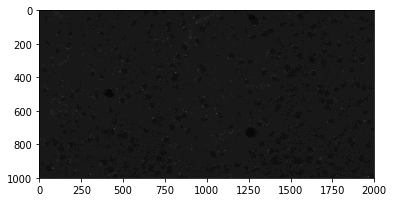

In [145]:
output_img = cv2.imread( fp_secondary_C_output ) 
plt.imshow(output_img*8)
plt.show()
del output_img

In [140]:
T = DataManager.load_transforms_v2(stack, in_image_resolution='raw', out_image_resolution='raw', use_inverse=True)[fn]

In [ ]:
T = DataManager.load_transforms(stack, downsample_factor=32, use_inverse=True)[fn]

In [135]:
T = get_anchor_transform(stack, fn, downsampled=True)

In [130]:
fp_secondary_C_output

'/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_C0_test/DK23_slide066_2019_09_11_S01_S0_C1_TuYFP_raw.tif'

convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide007_2019_09_10_S07_S6_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.995862,-0.090878,0.090878,0.995862,376.590685,224.628890'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_C0_test/DK23_slide007_2019_09_10_S07_S6_C1_TuYFP_raw.tif"
return code: 0


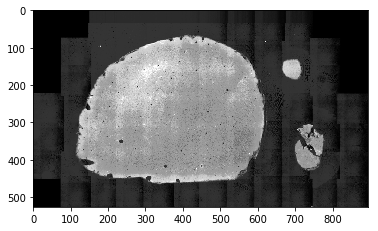

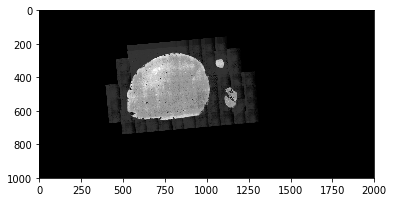

convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide025_2019_09_10_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999983,0.005889,-0.005889,0.999983,245.765654,44.984924'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_C0_test/DK23_slide025_2019_09_10_S01_S0_C1_TuYFP_raw.tif"
return code: 0


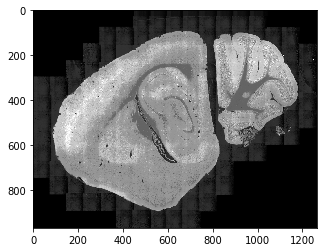

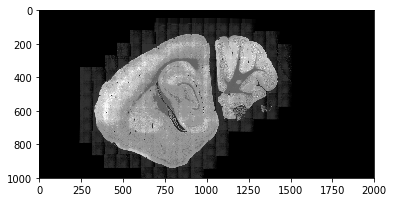

convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide055_2019_09_11_S08_S7_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999011,0.044467,-0.044467,0.999011,93.480412,-32.632134'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_C0_test/DK23_slide055_2019_09_11_S08_S7_C1_TuYFP_raw.tif"
return code: 0


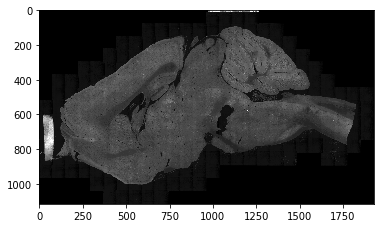

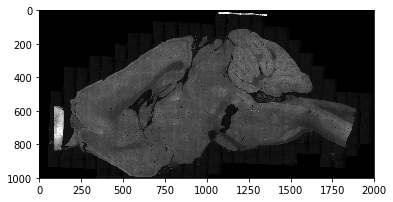

convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide072_2019_09_11_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999818,0.019081,-0.019081,0.999818,129.836426,-19.321442'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_C0_test/DK23_slide072_2019_09_11_S01_S0_C1_TuYFP_raw.tif"
return code: 0


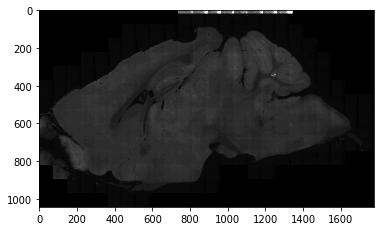

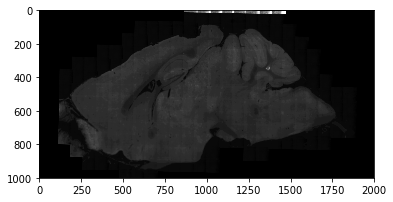

convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide103_2019_09_10_S19_S18_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.997023,0.077106,-0.077106,0.997023,85.199952,94.091543'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_C0_test/DK23_slide103_2019_09_10_S19_S18_C1_TuYFP_raw.tif"
return code: 0


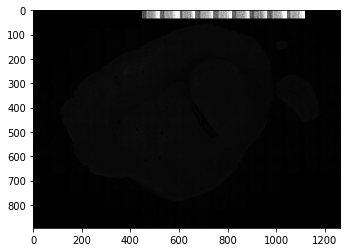

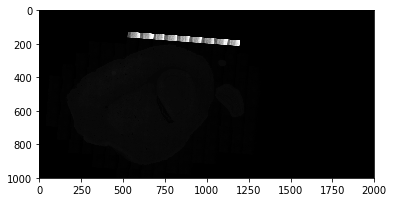

In [128]:
for fn in metadata_cache['filenames_to_sections'][stack].keys()[200:205]:
    fn_secondary_C = fn.replace('C0','C1').replace('CFP','TuYFP') + '_raw.tif'
    
    fp_secondary_C = os.path.join( DataManager.get_images_root_folder( stack ), stack+'_raw_C0', fn_secondary_C)
    fp_secondary_C_thumbnail = os.path.join( DataManager.get_images_root_folder( stack ), stack+'_raw_thumbnail_C0', fn_secondary_C)
    fp_secondary_C_output = os.path.join( DataManager.get_images_root_folder( stack ), stack+'_prep1_thumbnail_C0', fn_secondary_C)
    
    # Load anchor transform
    T = get_anchor_transform(stack, fn, downsampled=True)
    
    apply_transform( stack, T, input_fp=fp_secondary_C_thumbnail, output_fp=fp_secondary_C_output )
    
    input_img = cv2.imread( fp_secondary_C_thumbnail ) 
    output_img = cv2.imread( fp_secondary_C_output ) 
    plt.imshow(input_img)
    plt.show()
    plt.imshow(output_img)
    plt.show()

In [107]:
fn_to_raw_T_dict = DataManager.load_transforms_v2(stack, in_image_resolution='raw', out_image_resolution='raw', 
                               use_inverse=False, anchor_fn=metadata_cache['anchor_fn'][stack])

fn_to_raw_T_dict = DataManager.load_transforms_v2(stack, in_image_resolution='thumbnail', out_image_resolution='thumbnail', 
                               use_inverse=True, anchor_fn=metadata_cache['anchor_fn'][stack])

for fn in fn_to_raw_T_dict.keys()[201:202]:
    fn_secondary_C = fn.replace('C0','C1').replace('CFP','TuYFP') + '_raw.tif'
    
    fp_secondary_C_raw = os.path.join( DataManager.get_images_root_folder( stack ), stack+'_raw_C0', fn_secondary_C)
    fp_secondary_C_thumbnail = os.path.join( DataManager.get_images_root_folder( stack ), stack+'_raw_thumbnail_C0', fn_secondary_C)
    fp_secondary_C_output = os.path.join( DataManager.get_images_root_folder( stack ), stack+'_prep1_C0_test', fn_secondary_C)
    
    # Load anchor transform
    T = fn_to_raw_T_dict[fn]
#     T = np.array([[1,0,0],[0,1,0],[0,0,1]])
    
    apply_transform( stack, T, input_fp=fp_secondary_C_raw, output_fp=fp_secondary_C_output )
    

convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide042_2019_09_11_S01_S0_C1_TuYFP_raw.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999979,0.006413,-0.006413,0.999979,-136.270559,-8.321065'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_C0_test/DK23_slide042_2019_09_11_S01_S0_C1_TuYFP_raw.tif"
return code: 0


In [111]:
img = cv2.imread( fp_secondary_C_raw )

In [112]:
np.shape(img)

(26007, 42574, 3)

In [113]:
img = img[:,:,0]

In [116]:
cv2.imwrite( '/data2/testImg.tif', img )

True

In [118]:
del img

In [117]:
T = np.array([[1,0,0],[0,1,0],[0,0,1]])
    
apply_transform( stack, T, input_fp='/data2/testImg.tif', output_fp=fp_secondary_C_output )

convert "/data2/testImg.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '1.000000,0.000000,0.000000,1.000000,0.000000,0.000000'  -crop 2000x1000+0+0\!  -flatten -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_C0_test/DK23_slide042_2019_09_11_S01_S0_C1_TuYFP_raw.tif"
return code: 0


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [101]:
print get_anchor_transform(stack, fn, downsampled=32)

[[ 9.99979437e-01  6.41295604e-03  1.36321119e+02]
 [-6.41295604e-03  9.99979437e-01  7.44699663e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [90]:
DataManager.load_transforms_v2(stack, in_image_resolution='thumbnail', out_image_resolution='thumbnail', 
                               use_inverse=False, anchor_fn=metadata_cache['anchor_fn'][stack])[fn]

array([[ 9.99982660e-01, -5.88896596e-03,  2.45765654e+02],
       [ 5.88896596e-03,  9.99982660e-01,  4.49849244e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [94]:
DataManager.load_transforms_v2(stack, in_image_resolution='raw', out_image_resolution='raw', 
                               use_inverse=False, anchor_fn=metadata_cache['anchor_fn'][stack])[fn]

array([[ 9.99982660e-01, -5.88896596e-03,  7.86450093e+03],
       [ 5.88896596e-03,  9.99982660e-01,  1.43951758e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [88]:
DataManager.load_transforms_v2(stack, in_image_resolution='thumbnail', out_image_resolution='thumbnail')[fn]

array([[ 9.99982660e-01,  5.88896596e-03, -2.46026307e+02],
       [-5.88896596e-03,  9.99982660e-01, -4.35368388e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [89]:
DataManager.load_transforms_v2(stack, in_image_resolution='thumbnail', out_image_resolution='thumbnail', anchor_fn=metadata_cache['anchor_fn'][stack])[fn]

array([[ 9.99982660e-01,  5.88896596e-03, -2.46026307e+02],
       [-5.88896596e-03,  9.99982660e-01, -4.35368388e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [91]:
229./5730

0.039965095986038396

In [93]:
1./32

0.03125

In [53]:
! python create_thumbnails_from_raw_images.py $stack

Setting environment for Precision WorkStation for Alex Newberry
No mcubes
[521 1057 128 465 None None]
[521 1057 128 465 None None]
[564 1088 102 736 None None]
[564 1088 102 736 None None]
[521 1057 128 465 None None]
[521 1057 128 465 None None]
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide039_2019_09_10_S15_S14_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide039_2019_09_10_S15_S14_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide083_2019_09_10_S15_S14_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide083_2019_09_10_S15_S14_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide073_2019_09_11_S15_S14_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide073_2019_09_11_S15_S14_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide063_2019_09_11_S15_S14_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide063_2019_09_11_S15_S14_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide117_2019_09_10_S12_S11_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide117_2019_09_10_S

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide093_2019_09_10_S01_S0_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide093_2019_09_10_S01_S0_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide023_2019_09_10_S19_S18_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide023_2019_09_10_S19_S18_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide044_2019_09_11_S08_S7_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide044_2019_09_11_S08_

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide029_2019_09_10_S15_S14_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide029_2019_09_10_S15_S14_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide054_2019_09_03_S08_S7_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide054_2019_09_03_S08_S7_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide106_2019_09_10_S19_S18_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide106_2019_09_10_S19

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide103_2019_09_10_S13_S12_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide103_2019_09_10_S13_S12_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide052_2019_09_11_S15_S14_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide052_2019_09_11_S15_S14_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide055_2019_09_11_S15_S14_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide055_2019_09_11_S

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide110_2019_09_11_S01_S0_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide110_2019_09_11_S01_S0_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide003_2019_09_10_S01_S0_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide003_2019_09_10_S01_S0_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide119_2019_09_10_S06_S5_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide119_2019_09_10_S06_S5

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide061_2019_09_11_S08_S7_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide061_2019_09_11_S08_S7_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide115_2019_09_11_S13_S12_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide115_2019_09_11_S13_S12_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide094_2019_09_10_S22_S21_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide094_2019_09_10_S22

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide116_2019_09_10_S13_S12_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide116_2019_09_10_S13_S12_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide048_2019_09_11_S22_S21_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide048_2019_09_11_S22_S21_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide039_2019_09_10_S01_S0_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide039_2019_09_10_S0

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide112_2019_09_11_S19_S18_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide112_2019_09_11_S19_S18_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide026_2019_09_10_S01_S0_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide026_2019_09_10_S01_S0_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide103_2019_09_10_S01_S0_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide103_2019_09_10_S01_

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide017_2019_09_11_S13_S12_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide017_2019_09_11_S13_S12_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide088_2019_09_11_S01_S0_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide088_2019_09_11_S01_S0_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide082_2019_09_11_S22_S21_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide082_2019_09_11_S22

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide041_2019_09_11_S08_S7_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide041_2019_09_11_S08_S7_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide115_2019_09_11_S01_S0_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide115_2019_09_11_S01_S0_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide010_2019_09_10_S13_S12_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide010_2019_09_10_S13_S

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide073_2019_09_11_S08_S7_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide073_2019_09_11_S08_S7_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide104_2019_09_10_S01_S0_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide104_2019_09_10_S01_S0_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide069_2019_09_11_S22_S21_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide069_2019_09_11_S22_S

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide104_2019_09_10_S07_S6_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide104_2019_09_10_S07_S6_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide064_2019_09_11_S08_S7_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide064_2019_09_11_S08_S7_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide028_2019_09_10_S07_S6_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide028_2019_09_10_S07_S6

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide100_2019_09_10_S15_S14_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide100_2019_09_10_S15_S14_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide028_2019_09_10_S19_S18_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide028_2019_09_10_S19_S18_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide014_2019_09_10_S01_S0_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide014_2019_09_10_S0

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide019_2019_09_11_S13_S12_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide019_2019_09_11_S13_S12_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide042_2019_09_11_S08_S7_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide042_2019_09_11_S08_S7_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide040_2019_09_10_S08_S7_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide040_2019_09_10_S08_

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide109_2019_09_10_S19_S18_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide109_2019_09_10_S19_S18_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide118_2019_09_10_S07_S6_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide118_2019_09_10_S07_S6_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide035_2019_09_10_S01_S0_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide035_2019_09_10_S01_

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide020_2019_09_11_S01_S0_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide020_2019_09_11_S01_S0_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide060_2019_09_11_S15_S14_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide060_2019_09_11_S15_S14_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide105_2019_09_10_S13_S12_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide105_2019_09_10_S13

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide050_2019_09_11_S08_S7_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide050_2019_09_11_S08_S7_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide009_2019_09_10_S19_S18_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide009_2019_09_10_S19_S18_C0_CFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw/DK23_slide038_2019_09_10_S01_S0_C0_CFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail/DK23_slide038_2019_09_10_S01_

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide105_2019_09_10_S13_S12_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide105_2019_09_10_S13_S12_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide040_2019_09_10_S15_S14_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide040_2019_09_10_S15_S14_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide045_2019_09_03_S15_S14_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide098_2019_09_10_S01_S0_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide098_2019_09_10_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide069_2019_09_11_S15_S14_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide069_2019_09_11_S15_S14_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide022_2019_09_10_S07_S6_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/D

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide106_2019_09_10_S07_S6_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide106_2019_09_10_S07_S6_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide077_2019_09_11_S01_S0_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide077_2019_09_11_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide111_2019_09_10_S13_S12_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide098_2019_09_10_S21_S20_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide098_2019_09_10_S21_S20_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide008_2019_09_10_S13_S12_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide008_2019_09_10_S13_S12_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide018_2019_09_10_S07_S6_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide031_2019_09_10_S08_S7_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide031_2019_09_10_S08_S7_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide058_2019_09_11_S08_S7_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide058_2019_09_11_S08_S7_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide053_2019_09_11_S01_S0_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK2

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide034_2019_09_11_S08_S7_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide034_2019_09_11_S08_S7_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide006_2019_09_10_S18_S17_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide006_2019_09_10_S18_S17_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide071_2019_09_11_S01_S0_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/D

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide054_2019_09_03_S01_S0_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide054_2019_09_03_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide093_2019_09_10_S15_S14_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide093_2019_09_10_S15_S14_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide044_2019_09_11_S15_S14_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide035_2019_09_10_S01_S0_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide035_2019_09_10_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide027_2019_09_10_S19_S18_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide027_2019_09_10_S19_S18_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide065_2019_09_11_S01_S0_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/D

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide033_2019_09_10_S01_S0_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide033_2019_09_10_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide073_2019_09_11_S08_S7_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide073_2019_09_11_S08_S7_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide071_2019_09_11_S08_S7_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK2

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide094_2019_09_10_S22_S21_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide094_2019_09_10_S22_S21_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide064_2019_09_11_S22_S21_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide064_2019_09_11_S22_S21_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide074_2019_09_11_S15_S14_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide005_2019_09_10_S11_S10_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide005_2019_09_10_S11_S10_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide072_2019_09_11_S01_S0_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide072_2019_09_11_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide104_2019_09_10_S07_S6_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/D

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide072_2019_09_11_S15_S14_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide072_2019_09_11_S15_S14_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide043_2019_09_11_S22_S21_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide043_2019_09_11_S22_S21_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide091_2019_09_11_S08_S7_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide013_2019_09_10_S13_S12_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide013_2019_09_10_S13_S12_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide080_2019_09_11_S01_S0_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide080_2019_09_11_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide010_2019_09_10_S19_S18_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide098_2019_09_10_S14_S13_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide098_2019_09_10_S14_S13_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide062_2019_09_11_S15_S14_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide062_2019_09_11_S15_S14_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide003_2019_09_10_S01_S0_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide003_2019_09_10_S06_S5_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide003_2019_09_10_S06_S5_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide117_2019_09_10_S18_S17_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide117_2019_09_10_S18_S17_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide011_2019_09_10_S07_S6_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/D

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide023_2019_09_10_S01_S0_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide023_2019_09_10_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide003_2019_09_10_S16_S15_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide003_2019_09_10_S16_S15_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide028_2019_09_10_S07_S6_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/D

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide003_2019_09_10_S11_S10_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide003_2019_09_10_S11_S10_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide030_2019_09_10_S08_S7_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide030_2019_09_10_S08_S7_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide081_2019_09_11_S08_S7_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/D

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide056_2019_09_11_S08_S7_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide056_2019_09_11_S08_S7_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide051_2019_09_11_S22_S21_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide051_2019_09_11_S22_S21_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide047_2019_09_11_S22_S21_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/

return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide084_2019_09_10_S15_S14_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide084_2019_09_10_S15_S14_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide105_2019_09_10_S01_S0_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide105_2019_09_10_S01_S0_C1_TuYFP_raw.tif"
return code: 0
convert "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0/DK23_slide016_2019_09_10_S01_S0_C1_TuYFP_raw.tif" -resize 4% -auto-level -normalize                     -compress lzw "/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/D

In [38]:
os.path.join( DataManager.get_images_root_folder( stack ), stack+'_raw_thumbnail_C0', fn_secondary_C)

'/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_thumbnail_C0/DK23_slide015_2019_09_10_S13_S12_C1_TuYFP_raw.tif'

In [37]:
! ls /data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/

czi_raw_output
DK23_anchor.txt
DK23_custom_transforms
DK23_elastix_output
DK23_prep1_C0_test
DK23_prep1_thumbnail_NtbNormalized
DK23_raw
DK23_raw_C0
DK23_raw_Ntb
DK23_raw_thumbnail
DK23_raw_thumbnail_C0
DK23_sorted_filenames_post_slice_alignment.txt
DK23_sorted_filenames_till_slice_alignment.txt
DK23_sorted_filenames.txt
DK23_thumbnail_Ntb
DK23_thumbnail_NtbNormalized
DK23_transforms_to_anchor.csv
operation_configs
tmp


In [22]:
! mkdir /data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_prep1_C0_test/

In [26]:
# This will hold the pointer to all 
valid_secondary_channel_fps = []
# Populate valid_secondary_channel_fps with valid fps
for i in range(5):
    secondary_channel_fp = os.path.join( DataManager.get_images_root_folder( stack ), stack+'_raw_C'+str(i))
    if os.path.exists(secondary_channel_fp):
        valid_secondary_channel_fps.append( secondary_channel_fp )

In [27]:
valid_secondary_channel_fps[0]

'/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/DK23_raw_C0'

In [19]:
fp_to_check

'/data2/Atlas_Root_Dirs/Beta_Testing/CSHL_data_processed/DK23/raw_C4'

In [9]:
metadata_cache['filenames_to_sections'][stack]

{'DK23_slide001_2019_09_10_S05_S4_C0_CFP': 2,
 'DK23_slide001_2019_09_10_S09_S8_C0_CFP': 3,
 'DK23_slide002_2019_09_10_S01_S0_C0_CFP': 4,
 'DK23_slide002_2019_09_10_S06_S5_C0_CFP': 5,
 'DK23_slide002_2019_09_10_S11_S10_C0_CFP': 6,
 'DK23_slide002_2019_09_10_S16_S15_C0_CFP': 7,
 'DK23_slide003_2019_09_10_S01_S0_C0_CFP': 8,
 'DK23_slide003_2019_09_10_S06_S5_C0_CFP': 9,
 'DK23_slide003_2019_09_10_S11_S10_C0_CFP': 10,
 'DK23_slide004_2019_09_10_S01_S0_C0_CFP': 12,
 'DK23_slide004_2019_09_10_S06_S5_C0_CFP': 13,
 'DK23_slide004_2019_09_10_S11_S10_C0_CFP': 14,
 'DK23_slide004_2019_09_10_S16_S15_C0_CFP': 15,
 'DK23_slide005_2019_09_10_S01_S0_C0_CFP': 16,
 'DK23_slide005_2019_09_10_S06_S5_C0_CFP': 17,
 'DK23_slide005_2019_09_10_S11_S10_C0_CFP': 18,
 'DK23_slide005_2019_09_10_S17_S16_C0_CFP': 19,
 'DK23_slide006_2019_09_10_S01_S0_C0_CFP': 20,
 'DK23_slide006_2019_09_10_S06_S5_C0_CFP': 21,
 'DK23_slide006_2019_09_10_S12_S11_C0_CFP': 22,
 'DK23_slide006_2019_09_10_S18_S17_C0_CFP': 23,
 'DK23_slide

In [13]:
get_anchor_transform(stack, fn='DK23_slide060_2019_09_11_S08_S7_C0_CFP')

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
DataManager.